<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/FoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("/data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} exists, skipping")
else:
  print(f"Creating directory {image_path}")
  image_path.mkdir(parents=True, exist_ok=True)

Creating directory /data/pizza_steak_sushi


In [4]:
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data")
  f.write(request.content)

In [5]:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

In [6]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} dirs and {len(filenames)} images in {dirpath}")

walk_through_dir(image_path)


There are 2 dirs and 0 images in /data/pizza_steak_sushi
There are 3 dirs and 0 images in /data/pizza_steak_sushi/test
There are 0 dirs and 25 images in /data/pizza_steak_sushi/test/pizza
There are 0 dirs and 19 images in /data/pizza_steak_sushi/test/steak
There are 0 dirs and 31 images in /data/pizza_steak_sushi/test/sushi
There are 3 dirs and 0 images in /data/pizza_steak_sushi/train
There are 0 dirs and 78 images in /data/pizza_steak_sushi/train/pizza
There are 0 dirs and 75 images in /data/pizza_steak_sushi/train/steak
There are 0 dirs and 72 images in /data/pizza_steak_sushi/train/sushi


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/data/pizza_steak_sushi/train'),
 PosixPath('/data/pizza_steak_sushi/test'))

In [8]:
import random
from PIL import Image

random.seed(52)

image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list[:10]

[PosixPath('/data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('/data/pizza_steak_sushi/test/pizza/714866.jpg')]

In [9]:
random_image_path = random.choice(image_path_list)
print(random_image_path)

/data/pizza_steak_sushi/train/pizza/2992084.jpg


In [10]:
image_class = random_image_path.parent.stem
image_class

'pizza'

In [11]:
img = Image.open(random_image_path)

Text(0.5, 1.0, 'pizza')

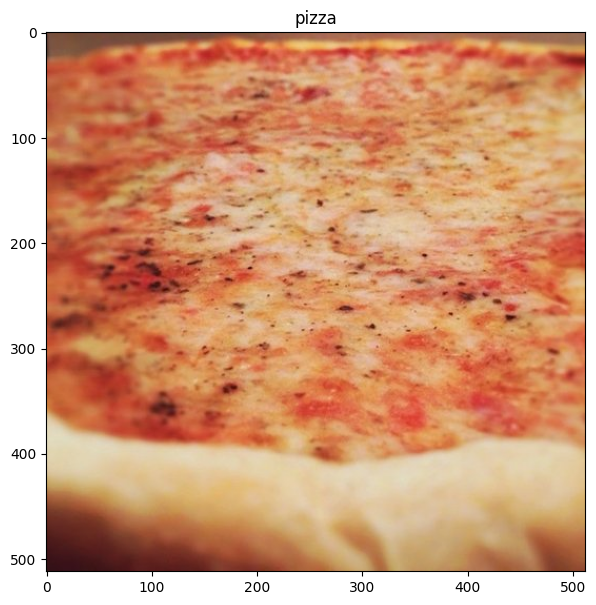

In [12]:
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(image_class)

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()]
)

In [15]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nsize: {f.size}")
      ax[0].axis(False)
      img_transformed = transform(f).squeeze()
      img_transformed = img_transformed.permute(1, 2, 0)
      ax[1].imshow(img_transformed)
      ax[1].set_title(f"Transformed\nshape: {img_transformed.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=20)

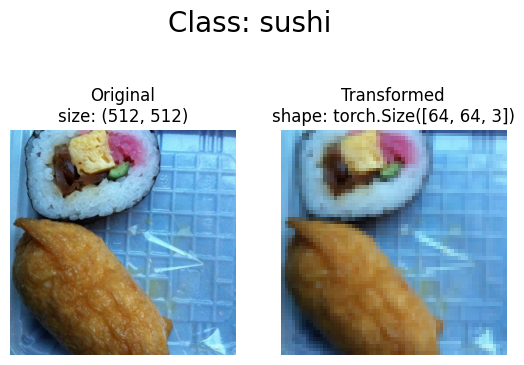

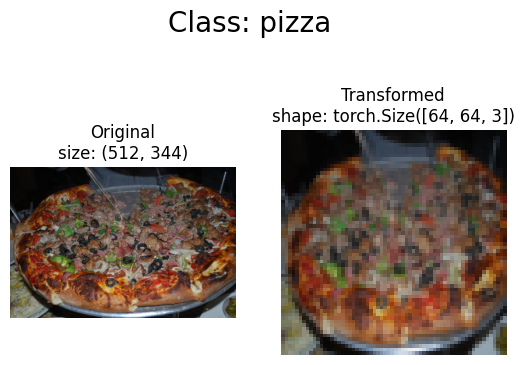

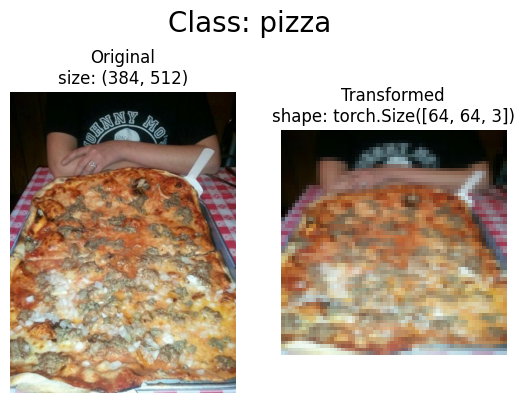

In [16]:
plot_transformed_images(image_path_list, data_transforms, n=3, seed=42)

In [17]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=data_transforms, target_transform=None)

In [18]:
test_data = datasets.ImageFolder(root=test_dir, transform=data_transforms, target_transform=None)

In [19]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [20]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [21]:
img, label = train_data[0][0], train_data[0][1]

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

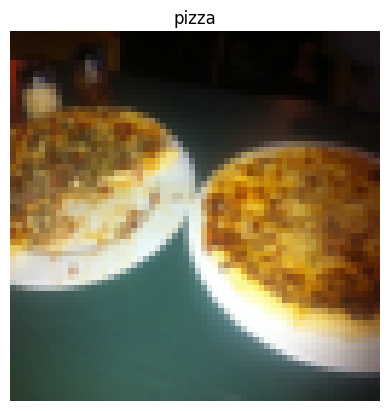

In [22]:
img_permute = img.permute(1, 2, 0)
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False)

In [23]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False,num_workers=os.cpu_count())

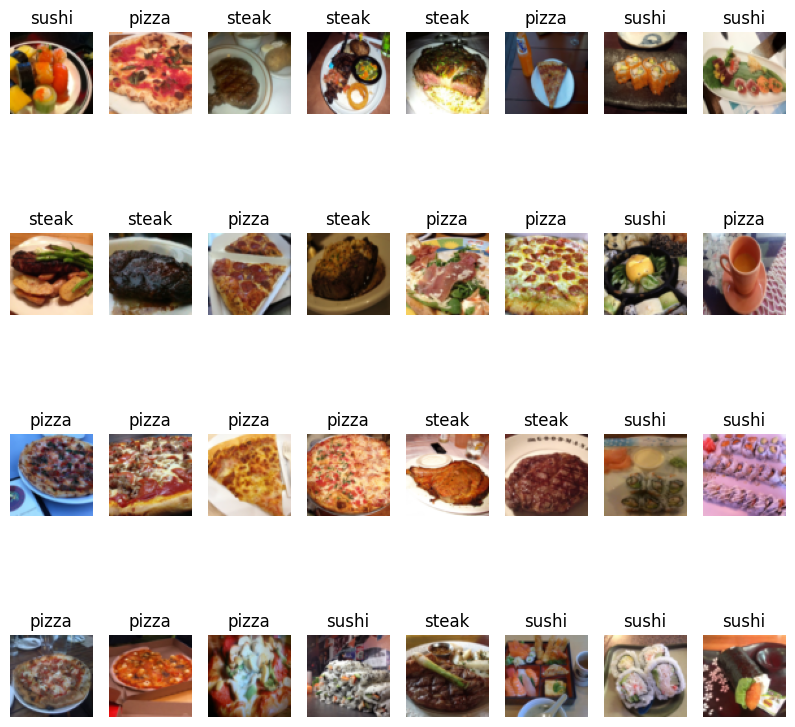

In [24]:
img, label = next(iter(train_dataloader))

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
  ax.imshow(img[i].permute(1, 2, 0))
  ax.set_title(class_names[label[i]])
  ax.axis(False)

In [25]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [26]:
torch.manual_seed(52)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(class_names)).to(device)

In [27]:
image_batch, label_batch = next(iter(train_dataloader))

In [28]:
model_0(image_batch.to(device))

tensor([[-1.8080e-02,  2.1829e-02, -6.7851e-03],
        [-1.2315e-02,  1.7587e-02, -2.0353e-03],
        [-6.9534e-03,  1.7735e-02, -3.9568e-03],
        [-1.3545e-02,  2.2505e-02, -3.8020e-03],
        [-1.5724e-02,  2.4570e-02, -4.1286e-03],
        [-1.3334e-02,  1.9148e-02, -3.1030e-03],
        [-1.3975e-02,  2.2880e-02, -4.7276e-03],
        [-1.6446e-02,  2.4406e-02, -2.9735e-03],
        [-1.5252e-02,  2.3503e-02, -4.0140e-03],
        [-1.5852e-02,  2.0889e-02, -7.5170e-04],
        [-2.0244e-02,  2.3355e-02, -1.6058e-03],
        [-1.1946e-02,  2.2774e-02, -1.9853e-03],
        [-1.3973e-02,  2.1038e-02, -2.2205e-03],
        [-1.1294e-02,  1.6962e-02, -5.2312e-03],
        [-1.4614e-02,  2.6190e-02,  2.9967e-03],
        [-1.5864e-02,  2.3013e-02,  1.8214e-03],
        [-1.8846e-02,  2.4665e-02,  7.1361e-04],
        [-1.4523e-02,  2.6737e-02, -7.9146e-04],
        [-1.4525e-02,  2.0427e-02, -3.7825e-04],
        [-1.4935e-02,  2.3791e-02, -3.3020e-03],
        [-2.1537e-02

In [29]:
!pip install torchinfo

In [30]:
from torchinfo import summary

summary(model_0, input_size=(BATCH_SIZE, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [31]:
def train_step(model, dataloader, loss_fn, optimizer, device=device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  return train_loss, train_acc


In [32]:
def test_step(model, dataloader, loss_fn, device=device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [33]:
!pip install tqdm

In [34]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=5, device=device):
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  start_time = timer()

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn)

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

    print(f"\nEpoch {epoch}\nTrain acc {train_acc}\nTrain loss {train_acc}\nTest acc {test_acc}\nTest loss {test_loss}")

  end_time = timer()

  return results, (end_time-start_time)

In [35]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(class_names)).to(device)

In [36]:
NUM_EPOCHS = 50
LR = 0.0001
optim = torch.optim.Adam(params=model_0.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

results_0, train_test_time = train(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optim, loss_fn=loss_fn, epochs=NUM_EPOCHS)

print(f"{results_0}\n{train_test_time}")

  0%|          | 0/50 [00:00<?, ?it/s]


Epoch 0
Train acc 0.42578125
Train loss 0.42578125
Test acc 0.2604166666666667
Test loss 1.1102392673492432

Epoch 1
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.1132243076960247

Epoch 2
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.117062250773112

Epoch 3
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.1204863786697388

Epoch 4
Train acc 0.42578125
Train loss 0.42578125
Test acc 0.2604166666666667
Test loss 1.1169854799906414

Epoch 5
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.1176645358403523

Epoch 6
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.1187670628229778

Epoch 7
Train acc 0.42578125
Train loss 0.42578125
Test acc 0.2604166666666667
Test loss 1.1150004466374714

Epoch 8
Train acc 0.3046875
Train loss 0.3046875
Test acc 0.2604166666666667
Test loss 1.1138832966486614

Epoch 9
Train acc 0.3046875
Tra

In [37]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="Train")
  plt.plot(epochs, test_loss, label="Test")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label="Train")
  plt.plot(epochs, test_acc, label="Test")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

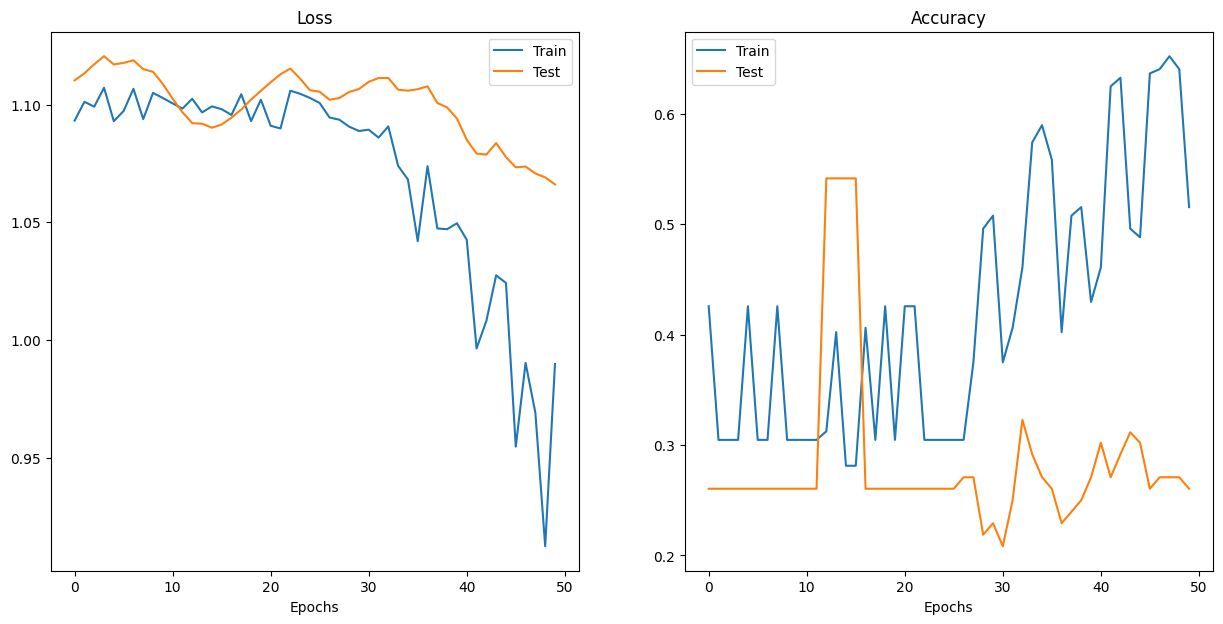

In [38]:
plot_loss_curves(results_0)

Overfit

In [39]:
from torchvision import transforms

train_transform_trivial = transforms.Compose(
    [transforms.Resize(size=(64, 64)),
     transforms.TrivialAugmentWide(num_magnitude_bins=31),
     transforms.ToTensor()]
)

test_transform_trivial = transforms.Compose(
    [transforms.Resize(size=(64, 64)),
     transforms.ToTensor()]
)

In [40]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_augmented = datasets.ImageFolder(root=test_dir,
                                            transform=test_transform_trivial)

In [41]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

In [42]:
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape = len(train_data_augmented.classes)).to(device)

In [43]:
NUM_EPOCHS = 50
LR = 0.0001
optim = torch.optim.Adam(params=model_1.parameters(), lr=LR)
loss_fn = nn.CrossEntropyLoss()

results_1, train_test_time = train(model=model_1, train_dataloader=train_dataloader_augmented, test_dataloader=test_dataloader_simple, optimizer=optim, loss_fn=loss_fn, epochs=NUM_EPOCHS)

print(f"{results_1}\n{train_test_time}")

  0%|          | 0/50 [00:00<?, ?it/s]


Epoch 0
Train acc 0.27734375
Train loss 0.27734375
Test acc 0.32954545454545453
Test loss 1.0980441172917683

Epoch 1
Train acc 0.4453125
Train loss 0.4453125
Test acc 0.32196969696969696
Test loss 1.097696304321289

Epoch 2
Train acc 0.40625
Train loss 0.40625
Test acc 0.38257575757575757
Test loss 1.0964725017547607

Epoch 3
Train acc 0.28125
Train loss 0.28125
Test acc 0.40246212121212127
Test loss 1.0947396755218506

Epoch 4
Train acc 0.28125
Train loss 0.28125
Test acc 0.42234848484848486
Test loss 1.0928856134414673

Epoch 5
Train acc 0.40234375
Train loss 0.40234375
Test acc 0.362689393939394
Test loss 1.0952558914820354

Epoch 6
Train acc 0.28125
Train loss 0.28125
Test acc 0.38257575757575757
Test loss 1.0950485467910767

Epoch 7
Train acc 0.40234375
Train loss 0.40234375
Test acc 0.42234848484848486
Test loss 1.0947842200597127

Epoch 8
Train acc 0.28125
Train loss 0.28125
Test acc 0.42234848484848486
Test loss 1.0944459040959675

Epoch 9
Train acc 0.40234375
Train loss 0.40

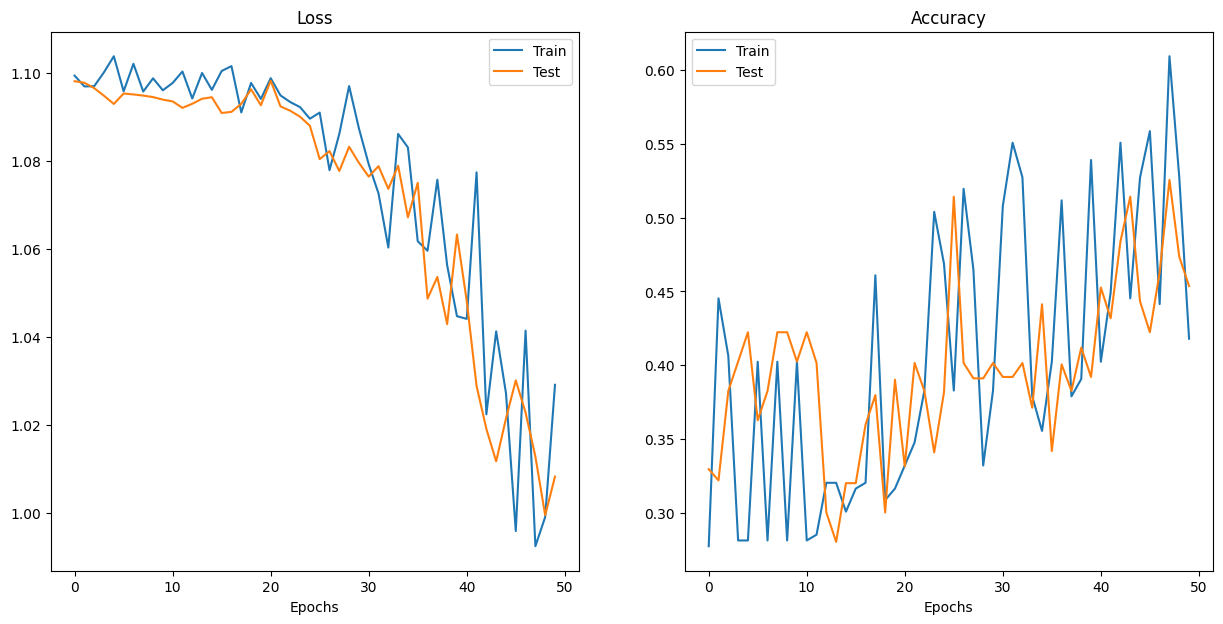

In [44]:
plot_loss_curves(results_1)

In [45]:
import pandas as pd
model_0_df = pd.DataFrame(results_0)
model_1_df = pd.DataFrame(results_1)

Text(0.5, 0, 'Epochs')

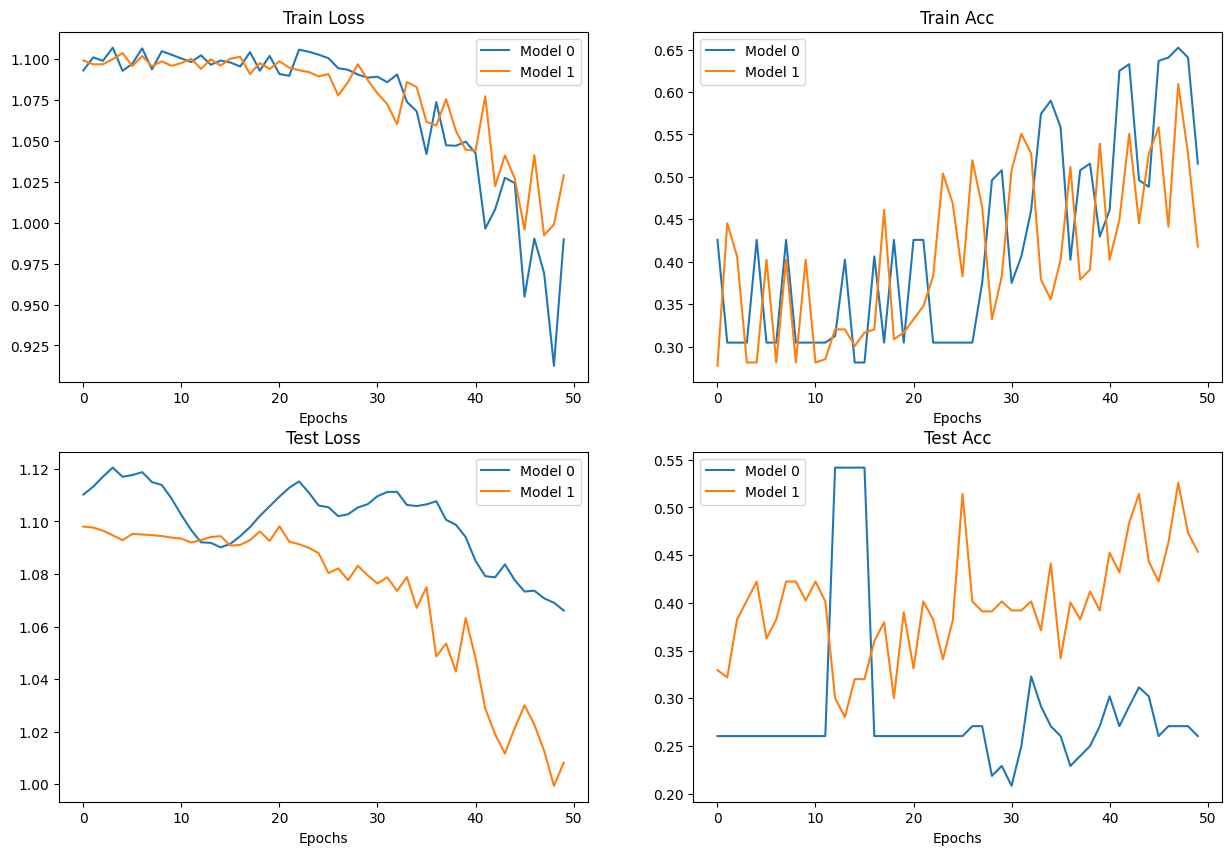

In [46]:
import numpy as np
epochs = np.arange(NUM_EPOCHS)
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.legend()
plt.xlabel("Epochs")
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Acc")
plt.legend()
plt.xlabel("Epochs")
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.legend()
plt.xlabel("Epochs")
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Acc")
plt.legend()
plt.xlabel("Epochs")

In [50]:
import torchvision

IMAGE = "sample_data/pizza.jpg"

custom_image_uint8 = torchvision.io.read_image(IMAGE)

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

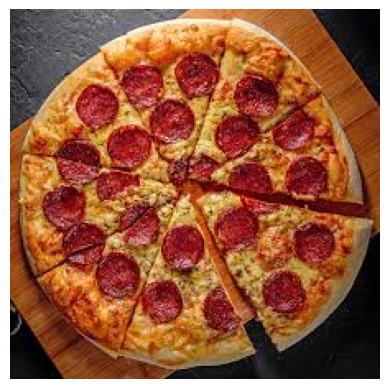

In [52]:
plt.imshow(custom_image_uint8.permute(1,2,0))
plt.axis(False)

In [55]:
custom_image_tensor = custom_image_uint8.type(torch.float32).to(device)

In [58]:
transforms_custom = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

resized_image_tensor = transforms_custom(custom_image_tensor)

custom_image_transforms = resized_image_tensor / 255.0

In [59]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transforms.unsqueeze(dim=0))
#unsqueeze for batch size

In [63]:
torch.softmax(custom_image_pred, dim=1)

tensor([[0.3570, 0.2877, 0.3553]])

In [62]:
class_names[torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1).cpu()]

'pizza'

In [72]:
def pred_and_plot_image(model, image_path, class_names, transform = None, device=device):
  image = torchvision.io.read_image(str(image_path))
  target_image = image.type(torch.float32)
  target_image = image / 255.0
  if transform:
    target_image = transform(target_image)

  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image_pred = model(target_image.unsqueeze(dim=0).to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  plt.figure(figsize=(10, 7))
  plt.imshow(image.permute(1, 2, 0))
  if class_names:
    plt.title(f"Pred: {class_names[target_image_pred_label.cpu()]} , Prob: {target_image_pred_probs.cpu().max():.3f}")
  else:
    plt.title(f"Pred: {target_image_pred_label.cpu()} , Prob: {target_image_pred_probs.cpu().max():.3f}")
  plt.axis(False)

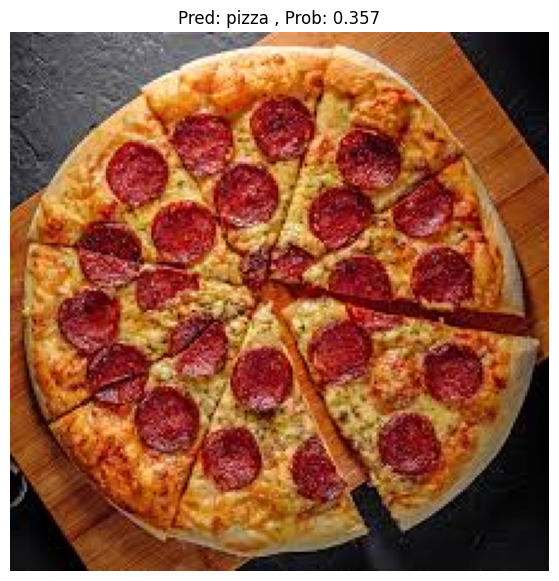

In [73]:
pred_and_plot_image(model_1, "sample_data/pizza.jpg", class_names, transform=transforms_custom)